In [1]:
from sklearn.datasets import load_breast_cancer
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
data = load_breast_cancer()
X = pd.DataFrame(data.data, columns=data.feature_names)
y = data.target 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [2]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
svm_linear = SVC(kernel='linear')
svm_linear.fit(X_train, y_train)
y_pred_linear = svm_linear.predict(X_test)
print("Linear Kernel Accuracy:", accuracy_score(y_test, y_pred_linear))
svm_rbf = SVC(kernel='rbf')
svm_rbf.fit(X_train, y_train)
y_pred_rbf = svm_rbf.predict(X_test)
print("RBF Kernel Accuracy:", accuracy_score(y_test, y_pred_rbf))

Linear Kernel Accuracy: 0.956140350877193
RBF Kernel Accuracy: 0.9824561403508771


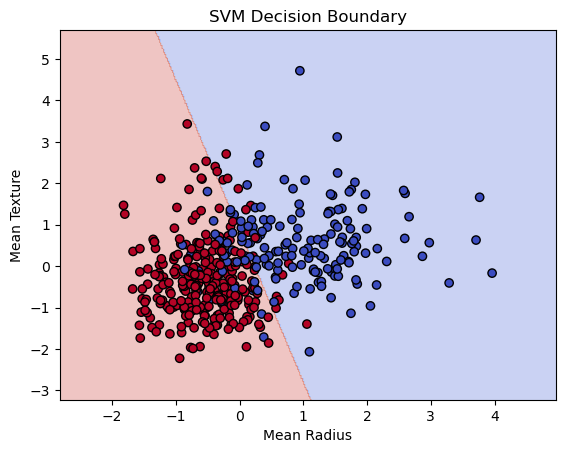

In [3]:
import matplotlib.pyplot as plt
import numpy as np
X_vis = X[['mean radius', 'mean texture']]
y_vis = y
X_train_vis, X_test_vis, y_train_vis, y_test_vis = train_test_split(X_vis, y_vis, test_size=0.2, random_state=42)
X_train_vis = scaler.fit_transform(X_train_vis)
X_test_vis = scaler.transform(X_test_vis)
model_vis = SVC(kernel='linear')
model_vis.fit(X_train_vis, y_train_vis)
def plot_decision_boundary(X, y, model):
    h = 0.02
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)
    plt.contourf(xx, yy, Z, alpha=0.3, cmap=plt.cm.coolwarm)
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.coolwarm, edgecolors='k')
    plt.xlabel('Mean Radius')
    plt.ylabel('Mean Texture')
    plt.title('SVM Decision Boundary')
    plt.show()
plot_decision_boundary(X_train_vis, y_train_vis, model_vis)

In [4]:
svm_tuned = SVC(kernel='rbf', C=10, gamma=0.1)
svm_tuned.fit(X_train, y_train)
y_pred_tuned = svm_tuned.predict(X_test)
print("Tuned Model Accuracy:", accuracy_score(y_test, y_pred_tuned))

Tuned Model Accuracy: 0.9649122807017544


In [5]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(SVC(kernel='rbf', C=10, gamma=0.1), X, y, cv=5)
print("Cross-validation accuracy scores:", scores)
print("Mean CV Accuracy:", scores.mean())

Cross-validation accuracy scores: [0.62280702 0.62280702 0.63157895 0.63157895 0.62831858]
Mean CV Accuracy: 0.6274181027790716
